In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
# Load the cafe dataset
df = pd.read_csv("cafe_clustered_data.csv")  # Make sure file is in your working directory
df.head()


,Quantity,Price Per Unit,Total Spent,Item_Coffee,Item_Cookie,Item_Juice,Item_Salad,Item_Sandwich,Item_Smoothie,Item_Tea,Payment Method_Credit Card,Payment Method_Digital Wallet,Location_Takeaway,Cluster
0,2.0,2.0,4.0,True,False,False,False,False,False,False,True,False,True,1
1,4.0,3.0,12.0,False,False,False,False,False,False,False,False,False,False,1
2,2.0,2.0,4.0,True,False,False,False,False,False,False,False,True,False,1
3,5.0,4.0,20.0,False,False,False,False,False,True,False,True,False,False,1
4,5.0,3.0,15.0,False,False,False,False,True,False,False,False,False,True,1


In [3]:
# Features and Target
X = df[['Quantity', 'Price Per Unit']]     # Independent variables
y = df['Total Spent']                      # Dependent variable


In [4]:
# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
# Create and train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_rf_pred = rf_model.predict(X_test)


In [6]:
# Evaluate model
rf_r2 = r2_score(y_test, y_rf_pred)
rf_mse = mean_squared_error(y_test, y_rf_pred)

print("🌲 Random Forest Regression Results:")
print("📘 R² Score:", rf_r2)
print("📉 Mean Squared Error:", rf_mse)


🌲 Random Forest Regression Results:
📘 R² Score: 0.9270621523658189
📉 Mean Squared Error: 2.676118758775631


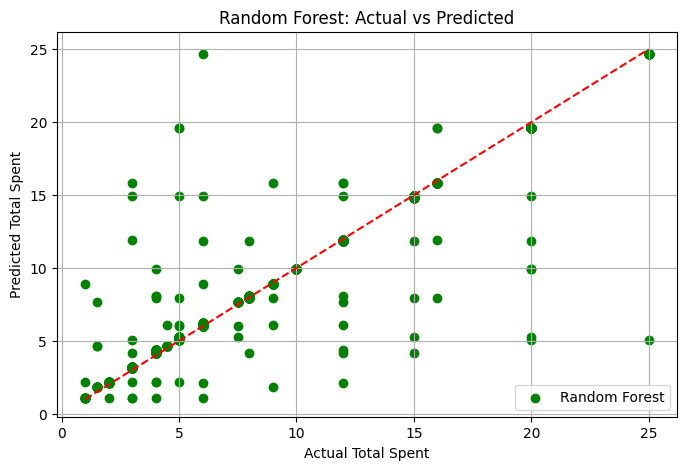

In [7]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_rf_pred, color='green', label='Random Forest')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Total Spent")
plt.ylabel("Predicted Total Spent")
plt.title("Random Forest: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


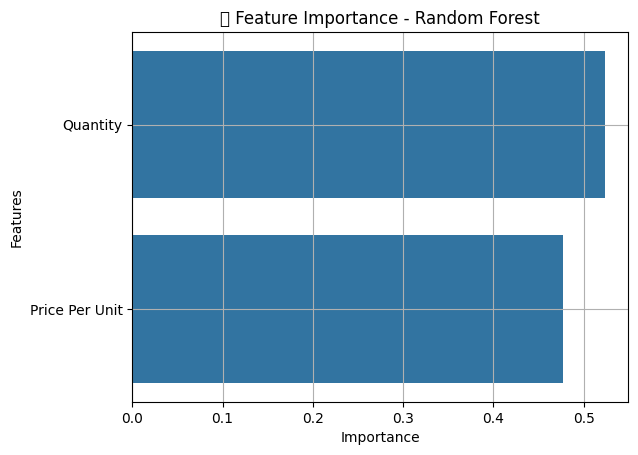

In [8]:
# Show feature importance
feature_importance = rf_model.feature_importances_
features = X.columns

sns.barplot(x=feature_importance, y=features)
plt.title("🔍 Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.grid(True)
plt.show()
